In [96]:
import json
import pandas as pd
import unicodedata
import matplotlib.pyplot as plt

def elimina_tildes_utf(cadena):
    cadena = cadena.decode('utf-8')
    s = ''.join((c for c in unicodedata.normalize('NFD',unicode(cadena)) if unicodedata.category(c) != 'Mn'))
    return s.decode().upper().strip(".")

In [29]:
#data = pd.read_table("../data/empty_dwelling.txt")
cantons = ["Zürich",
"Bern",
"Luzern",
"Uri",
"Schwyz",
"Obwalden",
"Nidwalden",
"Glarus",
"Zug",
"Fribourg",
"Solothurn",
"Basel-Stadt",
"Basel-Landschaft",
"Schaffhausen",
"Appenzell Ausserrhoden",
"Appenzell Innerrhoden",
"St. Gallen",
"Graubünden",
"Aargau",
"Thurgau",
"Ticino",
"Vaud",
"Valais",
"Neuchâtel",
"Genève",
"Jura"]
a = pd.Series(cantons).sort_values()
a = a.apply(elimina_tildes_utf)
cantons = list(a)
cantons

[u'AARGAU',
 u'APPENZELL AUSSERRHODEN',
 u'APPENZELL INNERRHODEN',
 u'BASEL-LANDSCHAFT',
 u'BASEL-STADT',
 u'BERN',
 u'FRIBOURG',
 u'GENEVE',
 u'GLARUS',
 u'GRAUBUNDEN',
 u'JURA',
 u'LUZERN',
 u'NEUCHATEL',
 u'NIDWALDEN',
 u'OBWALDEN',
 u'SCHAFFHAUSEN',
 u'SCHWYZ',
 u'SOLOTHURN',
 u'ST. GALLEN',
 u'THURGAU',
 u'TICINO',
 u'URI',
 u'VALAIS',
 u'VAUD',
 u'ZUG',
 u'ZURICH']

In [30]:

g = json.loads(open('../data/suiza.geojson').read())
distritos = g["features"]
districts = dict()

for distrito in distritos:
    lats = []
    lons = []
    name = elimina_tildes_utf(distrito["properties"]["name"].encode('utf-8'))
    coordenadas = distrito["geometry"]["coordinates"][0]
    for coordenada in coordenadas:
        lats.append(coordenada[1])
        lons.append(coordenada[0])
    districts[cantons.index(name)]={"canton":name,"lats":lats,"lons":lons}



In [31]:
def elimina_tildes_latin(cadena):
    cadena = cadena.decode('latin1')
    s = ''.join((c for c in unicodedata.normalize('NFD',unicode(cadena)) if unicodedata.category(c) != 'Mn'))
    return s.decode().upper().strip(".")
data["Canton"] = data["Canton"].apply(lambda x: elimina_tildes(x))

In [108]:
def equal_labels(cadena):
    if cadena.split()[0]=="APPENZELL":
        if cadena.split()[1].startswith("A"):
            return " ".join(cadena.split()[0].strip() + " AUSSERRHODEN")
        else:
            return "APPENZELL INNERRHODEN"
    else:
        return cadena


In [109]:
data["Canton"] = data["Canton"].apply(lambda x: equal_labels(x))

In [110]:
data

,Canton,Total_dwelling,empty_rooms_1,empty_rooms_2,empty_rooms_3,empty_rooms_4,empty_rooms_5,empty_rooms_6_plus,empty_sfh,empty_new,emty_rent,empty_sales,empty_proportion
0,VAUD,400395,362,605,999,868,453,366,604,546,2657,996,0.91
1,VALAIS,250465,629,1101,1750,1443,503,199,736,912,3888,1737,2.25
2,GENEVA,229551,203,190,217,179,125,253,204,40,866,301,0.51
3,BERN,558598,757,1708,3583,3253,944,500,971,895,9410,1335,1.92
4,FRIBOURG,145519,195,297,693,529,162,77,190,376,1730,223,1.34
5,SOLOTHURN,134540,219,486,1350,1295,389,154,374,464,3468,425,2.89
6,NEUCHATEL,94223,91,168,598,401,133,53,47,37,1412,32,1.53
7,JURA,37688,58,95,253,295,106,54,215,125,643,218,2.28
8,BASEL-STADT,108987,68,164,202,84,16,12,12,29,535,11,0.50
9,BASEL-LANDSCHAFT,138417,23,81,394,254,44,13,29,60,783,26,0.58


In [2]:
from zipch import ZipcodesDatabase
zd = ZipcodesDatabase('/tmp/zipcodes')

In [3]:
zd.get_cantons()

[u'AG',
 u'AI',
 u'AR',
 u'BE',
 u'BL',
 u'BS',
 u'FR',
 u'GE',
 u'GL',
 u'GR',
 u'JU',
 u'LI',
 u'LU',
 u'NE',
 u'NW',
 u'OW',
 u'SG',
 u'SH',
 u'SO',
 u'SZ',
 u'TG',
 u'TI',
 u'UR',
 u'VD',
 u'VS',
 u'ZG',
 u'ZH']

In [36]:
buildings = json.loads(open("../data/buildings.json").read())
buildings = buildings["buildings"]

In [54]:
f = open("../data/buildings.csv","w")
f.write("address;code;id;latitude;longitude\n")
for building in buildings:
    address = building["address"].encode('utf-8')
    print address
    line = ";".join([address,building["code"].encode('utf-8'),str(building["id"]),str(building["latitude"]),str(building["longitude"])])
    f.write(line+"\n")
f.close()

Wankdorfallee 4, 3030 Bern
Pfingstweidstrasse 60 B, 8005 Zürich
Mingerstrasse 20, 3030 Bern
Funkenstrasse 10, 4800 Zofingen
Engehaldenstrasse 35, 3012 Bern
Engehaldenstrasse 37, 3012 Bern
Engehaldenstrasse 39, 3012 Bern
Webergutstrasse 12A, 3052 Zollikofen
Webergutstrasse 12B, 3052 Zollikofen
Webergutstrasse 12C, 3052 Zollikofen
Stöckackerstrasse 50, 3027 Bern
Engehaldenstrasse 22/26, 3012 Bern
Eckweg 8, 2504 Biel
St. Leonhardstrasse 45, 9000 St. Gallen
Gürtelstrasse 14 + 20, 7000 Chur
Obernauerstrasse 18, 6010 Kriens
Rue du Grand-Pré 2A, 1007 Lausanne
Freiburgstrasse 453, 3018 Bern
Baumackerstrasse 42-46 / Franklinstrasse, 8050 Zürich
Viale Stazione 15, 6500 Bellinzona
Rue du Château d'en Bas 33, 1630 Bulle
Molliserstrasse 41, 8754 Netstal
Emil Frey Strasse 100, 4142 Münchenstein
Oberstrasse 153, 9000 St. Gallen
Oberstrasse 149, 9000 St. Gallen
Mingerstrase 12, 3014 Bern
Altgraben 5, 4624 Härkingen
Lischmatt 40, 4624 Härkingen


In [61]:
df = pd.read_csv("../data/buildings.csv",sep=";")
df["city"] = df["address"].apply(lambda x: elimina_tildes_utf(" ".join(x.split(",")[-1].split()[1:])))

In [64]:
len(df["city"].value_counts())

14

In [66]:
df.to_csv("../data/buildings.csv",index=False)

In [67]:
df.tail()

,address,code,id,latitude,longitude,city
23,"Oberstrasse 153, 9000 St. Gallen",St. Gallen PF Oberstr. 153,30,47.413776,9.355950,ST. GALLEN
24,"Oberstrasse 149, 9000 St. Gallen",St. Gallen PF Oberstr. 149,31,47.413931,9.356571,ST. GALLEN
25,"Mingerstrase 12, 3014 Bern",Bern PostFinance Arena,32,46.958556,7.468643,BERN
26,"Altgraben 5, 4624 Härkingen",Härkingen Paketzentrum,34,47.315800,7.808108,HARKINGEN
27,"Lischmatt 40, 4624 Härkingen",Härkingen Briefzentrum,35,47.318887,7.815960,HARKINGEN


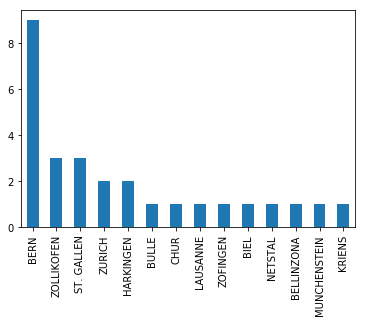

In [73]:
df['city'].value_counts().plot(kind='bar')
plt.show()

In [92]:
cities = pd.read_csv("../data/population.csv")
cities["Name"] = cities["Name"].apply(lambda x: x.split("[")[0].strip())
#print (cities.keys())
cities= cities[["Name","Population\nEstimate (E)\n2016-12-31"]]
cities["Name"] = cities["Name"].apply(lambda x: x.decode('utf-8').upper())

In [104]:
cities["Name"]= cities["Name"].apply(lambda x: elimina_tildes_utf(x.replace(u'\xa0', u' ')))
cities

,Name,Population Estimate (E) 2016-12-31
0,AARGAU,663462
1,APPENZELL AUSSERRHODEN,54954
2,APPENZELL INNERRHODEN,16003
3,BASEL-LANDSCHAFT,285624
4,BASEL-STADT,193070
5,BERN,1026513
6,FRIBOURG,311914
7,GENEVE,489524
8,GLARUS,40147
9,GRAUBUNDEN,197550


In [111]:
data = data.merge(name, left_on="Canton", right_on="Name", how = "outer")

ValueError: can not merge DataFrame with instance of type <type 'unicode'>

In [2]:
#from pymongo import MongoClient
import requests
from requests.auth import HTTPBasicAuth
import json


'''
============== 1 =============
Obtener numero de Workplaces
    fn = count
    of = desk
    *timeFilter.start
    *timeFilter.end
    *by = floor,attributeType         Number of workspaces by floor
    *by = building                    Number of workspaces by building

'''


s = requests.session()

HOST = "https://hack.lct.ee/api/v1/"

# GET
r = s.post("https://hack.lct.ee/dologin", data={'username': "galo.castillo", 'password': 'galoxD14123456789'})

FN = "sum" #count, sum, max, min, avg
OF = "desks.occupied" #desks, desks.occupied, desks.workhourOccupied
BY = "day"

BUILDING = "32" #Id of specific building
FLOOR = "" #Id of specific floor
ATTRIBUTE_NAME = "" # depends on location
ATTRIBUTE_ID = "" # depends on location

START = "" # starting time window
END = "" # ending time window

PARAM_NAMES = ["fn", "of", "by", "locationFilter.building", "locationFilter.floor", "locationFilter.attribute.", "timeFilter.start", "timeFilter.end"]
PARAMS = [FN, OF, BY, BUILDING, FLOOR, ATTRIBUTE_NAME, START, END]

# Query Builder

query_builder = "?"
for i, param in enumerate(PARAMS):
    if param == "":
        continue
    if PARAM_NAMES[i] == "locationFilter.attribute.":
        query_builder += "locationFilter.attribute." + ATTRIBUTE_NAME + "=" + ATTRIBUTE_ID
        continue
    query_builder += PARAM_NAMES[i] + "=" + param

    if i != len(PARAMS) -1:
        query_builder += "&"


print query_builder
print HOST + "stats" + query_builder
response = s.get(HOST + "stats" + query_builder)
print response
response = response.json()
print response
print len(response)

?fn=sum&of=desks.occupied&by=day&locationFilter.building=32&
https://hack.lct.ee/api/v1/stats?fn=sum&of=desks.occupied&by=day&locationFilter.building=32&
<Response [500]>


JSONDecodeError: Expecting value: line 1 column 1 (char 0)